# EPL 2024/25 Player Performance Analysis

This notebook presents an analysis of the top-performing players in the 2024/25 English Premier League (EPL) season. Using a manually collected dataset, we explore patterns in player performance based on position, and analyze how different metrics correlate with average match ratings.


## 1. Dataset Overview

The dataset includes the following features:

- Average Rating
- Goals
- Assists
- Minutes Played
- Average Passes
- Pass Success Rate
- Tackles
- Clearances
- Position (Attacker, Midfielder, Defender)

Below, we load and clean the dataset.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Player Data.xlsx")
df.dropna(inplace = True)
print(df.head())

  Player Name    Position  Mins  Avg Rating  Goals  Assists  Avg Passes  \
0       Salah    Attacker  3380        7.61     29       18        30.4   
1        Saka    Attacker  1737        7.37      6       10        23.9   
2      Palmer  Midfielder  3199        7.33    115        8        35.4   
3      Mbuemo    Attacker  3417        7.33     20        7        28.7   
4     Haaland    Attacker  2742        7.32     22        3        12.1   

   Pass Success Rate  Tackles  Clearances  Interceptions  
0               73.9      0.6         0.1            0.2  
1               84.3      1.2         0.2            0.1  
2               83.1      0.9         0.5            0.3  
3               73.9      1.3         1.3            0.4  
4               67.5      0.4         0.7            0.2  


## 2. Exploratory Data Analysis (EDA)

We start by summarizing the dataset and exploring the distribution of player positions and statistics.


In [22]:
Data_Stats_Description=df.describe()
print(Data_Stats_Description)

              Mins  Avg Rating       Goals    Assists  Avg Passes  \
count    20.000000   20.000000   20.000000  20.000000    20.00000   
mean   2773.150000    7.211500   15.550000   6.600000    33.70000   
std     538.272018    0.139294   24.647996   3.604091    15.23963   
min    1515.000000    7.070000    1.000000   1.000000    12.10000   
25%    2604.000000    7.090000    5.000000   5.000000    24.05000   
50%    2878.500000    7.185000    8.000000   6.000000    29.60000   
75%    3201.750000    7.320000   16.250000   8.000000    39.20000   
max    3417.000000    7.610000  115.000000  18.000000    79.00000   

       Pass Success Rate    Tackles  Clearances  Interceptions  
count          20.000000  20.000000   20.000000      20.000000  
mean           81.360000   1.425000    1.235000       0.505000  
std             5.973397   0.748244    1.639729       0.395335  
min            67.500000   0.400000    0.100000       0.100000  
25%            77.925000   1.075000    0.425000      

In [38]:
Correlation_Matrix=df.corr(numeric_only=True)
print(Correlation_Matrix)

print("\n")
position_count=df["Position"].value_counts()


print(position_count)

                       Mins  Avg Rating     Goals   Assists  Avg Passes  \
Mins               1.000000    0.128778  0.253906  0.060098    0.347338   
Avg Rating         0.128778    1.000000  0.450745  0.664880   -0.402052   
Goals              0.253906    0.450745  1.000000  0.228932   -0.131696   
Assists            0.060098    0.664880  0.228932  1.000000   -0.167884   
Avg Passes         0.347338   -0.402052 -0.131696 -0.167884    1.000000   
Pass Success Rate -0.303090   -0.562763 -0.160241 -0.207361    0.618097   
Tackles            0.122501   -0.542722 -0.348376 -0.169796    0.359694   
Clearances         0.356242   -0.422392 -0.238942 -0.592422    0.556669   
Interceptions      0.443363   -0.540147 -0.290348 -0.478730    0.722807   

                   Pass Success Rate   Tackles  Clearances  Interceptions  
Mins                       -0.303090  0.122501    0.356242       0.443363  
Avg Rating                 -0.562763 -0.542722   -0.422392      -0.540147  
Goals                

## 3. Correlation Analysis

We calculate the correlation matrix to identify which player stats are most strongly associated with average match rating. This is done for all players as well as separately for attackers, midfielders, and defenders.


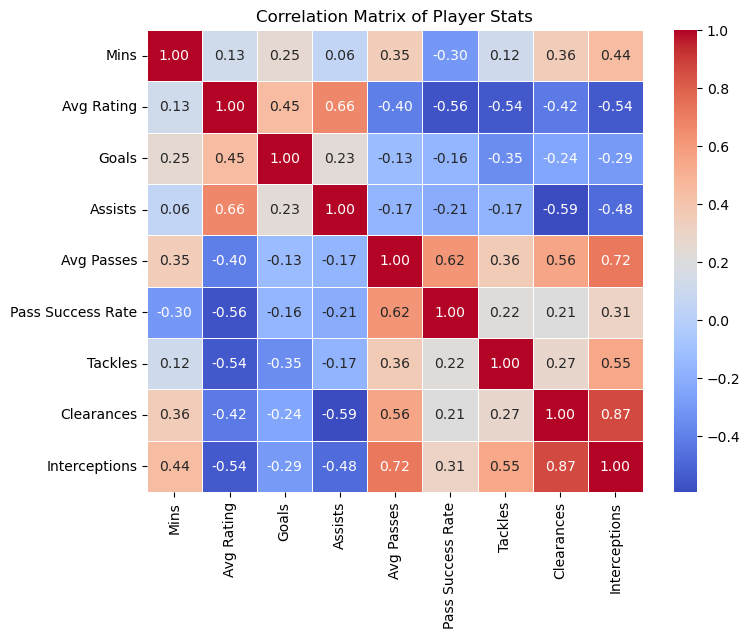

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Player Stats")
plt.show()


In [19]:
attackers=df[df["Position"]== "Attacker"]
midfielders= df[df["Position"]=="Midfielder"]
defenders=df[df["Position"]== "Defender"]


In [13]:
Correlation_Matrix_Attackers = attackers.corr(numeric_only=True)
print(Correlation_Matrix_Attackers)

                       Mins  Avg Rating     Goals   Assists  Avg Passes  \
Mins               1.000000    0.416391  0.676921  0.252166    0.022525   
Avg Rating         0.416391    1.000000  0.769459  0.691068    0.071694   
Goals              0.676921    0.769459  1.000000  0.345954   -0.182508   
Assists            0.252166    0.691068  0.345954  1.000000    0.470600   
Avg Passes         0.022525    0.071694 -0.182508  0.470600    1.000000   
Pass Success Rate -0.701466   -0.510456 -0.773305 -0.068035    0.427273   
Tackles           -0.203137   -0.493180 -0.739690 -0.158445    0.611600   
Clearances         0.534046   -0.040515  0.174678 -0.408391    0.000581   
Interceptions      0.416056   -0.293999 -0.203064 -0.068799    0.312980   

                   Pass Success Rate   Tackles  Clearances  Interceptions  
Mins                       -0.701466 -0.203137    0.534046       0.416056  
Avg Rating                 -0.510456 -0.493180   -0.040515      -0.293999  
Goals                

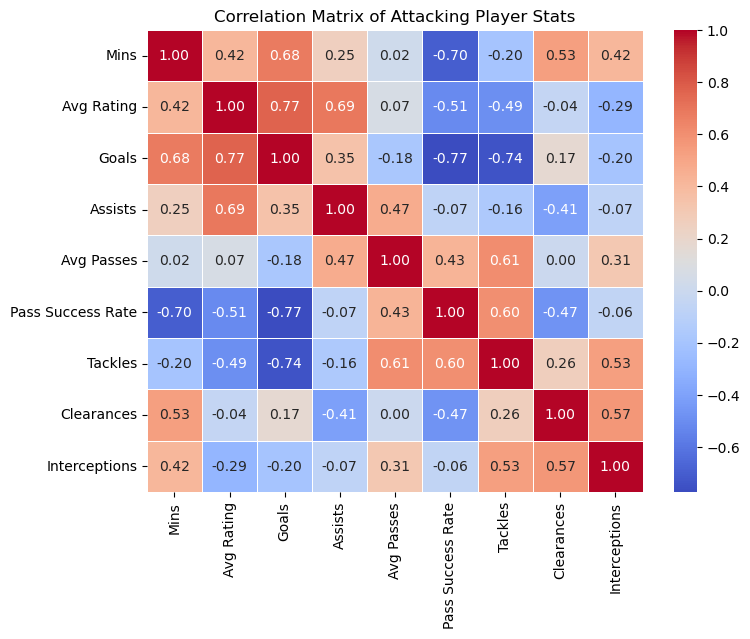

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_Matrix_Attackers, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Attacking Player Stats")
plt.show()


In [14]:
Correlation_Matrix_Midfielders = midfielders.corr(numeric_only=True)
print(Correlation_Matrix_Midfielders)

                       Mins  Avg Rating     Goals   Assists  Avg Passes  \
Mins               1.000000    0.194100  0.593058  0.745304    0.443442   
Avg Rating         0.194100    1.000000  0.678450  0.260707   -0.582215   
Goals              0.593058    0.678450  1.000000  0.233264   -0.402986   
Assists            0.745304    0.260707  0.233264  1.000000    0.560506   
Avg Passes         0.443442   -0.582215 -0.402986  0.560506    1.000000   
Pass Success Rate -0.041493   -0.820339 -0.256872 -0.315981    0.248615   
Tackles           -0.233161   -0.757325 -0.668922 -0.099909    0.676344   
Clearances         0.012658   -0.817337 -0.594920 -0.062973    0.521676   
Interceptions     -0.313864   -0.730733 -0.893541  0.102835    0.619099   

                   Pass Success Rate   Tackles  Clearances  Interceptions  
Mins                       -0.041493 -0.233161    0.012658      -0.313864  
Avg Rating                 -0.820339 -0.757325   -0.817337      -0.730733  
Goals                

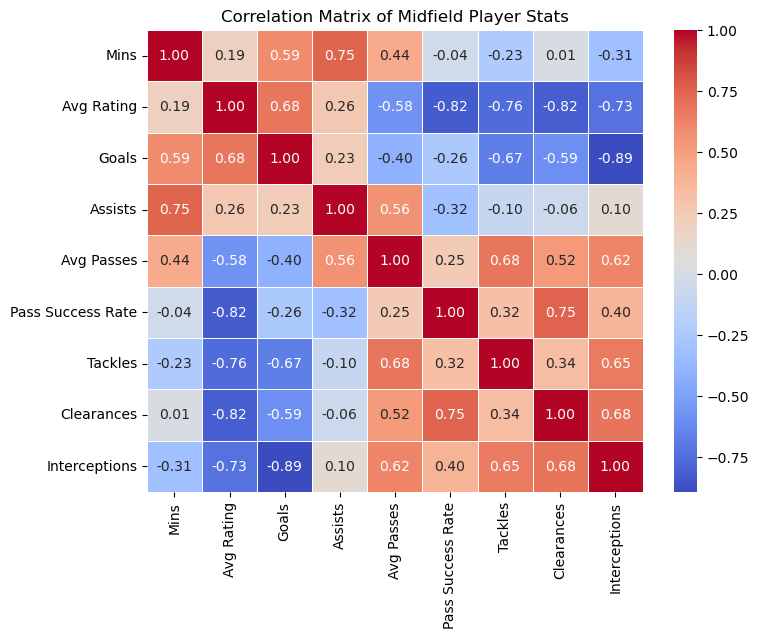

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_Matrix_Midfielders, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Midfield Player Stats")
plt.show()


In [15]:
Correlation_Matrix_Defenders = defenders.corr(numeric_only=True)
print(Correlation_Matrix_Defenders)

                       Mins  Avg Rating     Goals   Assists  Avg Passes  \
Mins               1.000000   -0.228747  0.728690  0.288642    0.564026   
Avg Rating        -0.228747    1.000000  0.500000  0.866025   -0.932882   
Goals              0.728690    0.500000  1.000000  0.866025   -0.154515   
Assists            0.288642    0.866025  0.866025  1.000000   -0.627809   
Avg Passes         0.564026   -0.932882 -0.154515 -0.627809    1.000000   
Pass Success Rate  0.347919   -0.992252 -0.388533 -0.797197    0.970403   
Tackles           -0.105735    0.992215  0.603957  0.921551   -0.880765   
Clearances        -0.570260   -0.669238 -0.978117 -0.951101    0.356688   
Interceptions      0.684844   -0.866025  0.000000 -0.500000    0.987990   

                   Pass Success Rate   Tackles  Clearances  Interceptions  
Mins                        0.347919 -0.105735   -0.570260       0.684844  
Avg Rating                 -0.992252  0.992215   -0.669238      -0.866025  
Goals                

## 4. Key Insights

- **Attackers**: Goals and average ratings are highly correlated.
- **Midfielders**: Pass success and assists have stronger influence.
- **Defenders**: Clearances and tackles correlate with better ratings.

These results highlight the differing performance metrics that matter most by role.


## 5. Conclusion & Next Steps

This analysis provides a foundation for building more advanced models or dashboards. Future work could include:

- Predictive modeling of player ratings
- Expanding the dataset with more teams and players
- Creating an interactive Streamlit dashboard

The cleaned code and findings are included below.
